In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
student_data = pd.read_excel('/Users/vigoroushui/Desktop/ChaoXing/shnu_t_statistics_student_clazz.xlsx')
student_data[student_data['exam_avgscore']!=0]

,Unnamed: 0,id,user_id,login_name,user_name,department_id,department_name,major_id,major_name,class_id,...,paper_num,paper_rate,pick_num,answer_num,markscore_num,markscore_rate,task_num,task_rate,update_time,insert_time
84742,84742,107353,54957995,170152007,郭心宇,723814,旅游学院,1489836,酒店管理,3849204,...,0,0,0,0,0,0,0,0,2019-08-29 20:51:56,2019-02-25
84838,84838,107449,54955882,160154261,姜智轩,723812,建筑工程学院,1257597,工程管理,1257598,...,0,0,0,0,0,0,0,0,2019-08-30 00:14:59,2019-03-07
84934,84934,107545,43136412,170154353,梁家峰,723808,商学院,1257538,经济学,2613988,...,0,0,0,0,0,0,0,0,2020-01-02 02:10:30,2019-11-29
84999,84999,107610,83467399,92831,周华,723817,信息与机电工程学院,0,NaN,0,...,0,0,0,0,0,0,0,0,2019-12-06 02:35:36,2019-10-17
85773,85773,108384,43136164,170144359,黄宸萱,723808,商学院,1257538,经济学,2613988,...,0,0,0,0,0,0,0,0,2019-12-20 16:57:13,2019-11-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121387,121387,143998,95414212,190122731,次旺卓玛,723813,马克思主义学院,1489863,思想政治教育,9726633,...,0,0,0,0,0,0,0,0,2020-02-09 01:18:46,2019-10-18
121389,121389,144000,95414588,190141027,丁诚健,295416,其他,1257545,2016届已毕业,9726687,...,0,0,0,0,0,0,0,0,2020-02-09 01:20:21,2019-10-18
121392,121392,144003,95417199,190152210,尉不凡,723817,信息与机电工程学院,1257579,电子信息工程,9726713,...,0,0,0,0,0,0,0,0,2020-02-09 19:09:34,2019-10-18
121395,121395,144006,95416373,190151072,方迅,295416,对外汉语学院,1257545,汉语国际教育,9726688,...,0,0,0,0,0,0,0,0,2020-02-04 03:25:42,2019-10-18


In [3]:
student_data = student_data[student_data['test_avgscore']!=0]
student_data.shape

(29742, 57)

In [4]:
student_data = student_data[student_data['exam_avgscore']!=0]
student_data.shape

(8279, 57)

In [5]:
type(student_data['department_name'])

pandas.core.series.Series

In [6]:
pd.pivot_table(student_data, index=['department_name'],values=['exam_avgscore'])

,exam_avgscore
department_name,
kjzx学生,83.000000
上海师范大学,72.805000
人文与社会科学学部,95.000000
人文学院,86.698198
体育学院,87.534188
信息与机电工程学院,82.769854
其他,84.200000
其他院系,84.000000
其它院系,82.500000


In [7]:
# 清除非法学院 共39条记录
def isnotin(a,b):
    if a in b:
        return False
    else:
        return True
department_del = ['其他','kjzx学生','上海师范大学','人文与社会科学学部','其他院系','其它院系','华东师范大学附属周浦中学','同济大学第二附属中学','复兴高级中学','物理','艺校','高中']
student_data = student_data[student_data['department_name'].map(lambda x:isnotin(x,department_del))]

In [8]:
student_data.groupby('user_name').count()

,Unnamed: 0,id,user_id,login_name,department_id,department_name,major_id,major_name,class_id,class_name,...,paper_num,paper_rate,pick_num,answer_num,markscore_num,markscore_rate,task_num,task_rate,update_time,insert_time
user_name,,,,,,,,,,,,,,,,,,,,,
丁丽杉,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
丁佑铭,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
丁佳艺,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
丁俐雯,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
丁君彦,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
龚玲玲,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
龚铭洁,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
龚闻琰,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [74]:
student_data.to_csv('../student_data.csv')

In [6]:
student_data = pd.read_csv('../student_data.csv')

In [8]:
student_data.head()

,Unnamed: 0,user_name,job_num,videojob_num,test_num,work_num,exam_num,pv,sign_num,bbs_num,topic_num,reply_num,work_avgscore,test_avgscore,exam_avgscore,score_label
0,92426,徐承威,4,0,3,1,1,28,4,0,0,0,65.0,60.47,40.00,0
1,92449,张驰,2,0,2,1,1,18,2,0,0,0,80.0,71.70,24.59,0
2,92845,谢静,6,0,3,1,1,46,4,0,0,0,76.3,59.23,28.81,0
3,93050,张海军,6,0,3,1,1,46,4,0,0,0,73.7,66.17,24.59,0
4,93922,付圣荃,3,0,3,1,1,23,2,0,0,0,87.5,64.93,28.69,0


In [9]:
behavior_columns = ['user_name','job_num','videojob_num','test_num','work_num', 
                    'exam_num','pv','sign_num', 'bbs_num', 'topic_num', 
                    'reply_num','work_avgscore','test_avgscore','exam_avgscore']
student_data_tmp = pd.DataFrame(student_data, columns=behavior_columns)

In [10]:
student_data_tmp.describe()

,job_num,videojob_num,test_num,work_num,exam_num,pv,sign_num,bbs_num,topic_num,reply_num,work_avgscore,test_avgscore,exam_avgscore
count,8240.000000,8240.000000,8240.000000,8240.000000,8240.0,8240.000000,8240.000000,8240.000000,8240.000000,8240.000000,8240.000000,8240.000000,8240.000000
mean,146.212500,80.688107,65.224757,0.005461,1.0,121.850485,0.018568,0.135073,0.106068,0.029005,0.411590,87.114218,86.256056
std,72.779925,38.728333,41.804674,0.078487,0.0,93.410963,0.263525,2.819545,2.805144,0.239367,5.723023,15.318359,11.321072
min,2.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.670000,7.000000
25%,96.000000,48.000000,42.000000,0.000000,1.0,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.962500,80.000000
50%,116.000000,63.000000,48.000000,0.000000,1.0,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.660000,88.000000
75%,143.000000,110.000000,71.000000,0.000000,1.0,176.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.720000,96.000000
max,354.000000,175.000000,179.000000,3.000000,1.0,1182.000000,4.000000,150.000000,150.000000,5.000000,99.000000,217.220000,100.000000


In [12]:
def set_label(x):
    if x >= 0 and x <= 59:
        return 0
    if x >= 60 and x <= 69:
        return 1
    if x >= 70 and x <= 79:
        return 2
    if x >= 80 and x <= 89:
        return 3
    else: 
        return 4
student_data_tmp['score_label'] = student_data_tmp['exam_avgscore'].map(lambda x:set_label(x))

In [13]:
student_data_tmp.sort_values(by='exam_avgscore')

,user_name,job_num,videojob_num,test_num,work_num,exam_num,pv,sign_num,bbs_num,topic_num,reply_num,work_avgscore,test_avgscore,exam_avgscore,score_label
48,魏雯雯,96,48,48,0,1,14,0,1,1,0,0.0,97.81,7.00,0
298,谭胜男,38,19,3,1,1,149,4,0,0,0,62.5,71.13,7.46,0
9,关骏朗,3,0,3,1,1,64,3,0,0,0,77.6,85.47,7.46,0
16,陈键锋,93,47,46,0,1,22,0,0,0,0,0.0,50.36,8.00,0
28,邱天宇,6,1,3,1,1,57,4,0,0,0,85.0,74.93,15.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7940,石金岳,85,42,42,0,1,79,0,0,0,0,0.0,91.07,100.00,4
7939,张子越,97,48,48,0,1,107,0,0,0,0,0.0,90.99,100.00,4
7934,吴梅怡,96,48,48,0,1,127,0,0,0,0,0.0,90.94,100.00,4
7996,陈燕翎,191,95,95,0,1,254,0,0,0,0,0.0,99.65,100.00,4


In [73]:
student_data_tmp_3 = student_data_tmp.drop(labels=['job_num','user_name','exam_avgscore','videojob_num','pv','test_num'], axis=1)
student_data_tmp_3.to_csv('./student_data_tmp_3.csv')

In [75]:
student_data_tmp.to_csv('../student_data.csv')

In [14]:
student_data_tmp_2 = student_data_tmp.drop(labels=['user_name','exam_avgscore'], axis=1)

In [15]:
list(student_data_tmp_2)

['job_num',
 'videojob_num',
 'test_num',
 'work_num',
 'exam_num',
 'pv',
 'sign_num',
 'bbs_num',
 'topic_num',
 'reply_num',
 'work_avgscore',
 'test_avgscore',
 'score_label']

In [16]:
student_data_tmp_2 = student_data_tmp_2.rename(columns={'job_num': '任务点完成数','videojob_num':'视频任务数','test_num':'章节测试完成数',
                                   'work_num':'作业完成数','exam_num':'考试完成数', 'pv':'学习访问量',
                                   'sign_num':'签到完成数','bbs_num':'讨论总数','topic_num':'发帖总数',
                                   'reply_num':'回帖总数','work_avgscore':'作业平均分','test_avgscore':'章节测验平均分'})

In [17]:
from sklearn.model_selection import train_test_split
x = student_data_tmp_2.drop(labels=['score_label'], axis=1)
y = student_data_tmp_2['score_label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2020, stratify=y)

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.fit_transform(x_test)
y_train_scaled = np.array(y_train)
y_test_scaled = np.array(y_test)
x_test_scaled

array([[ 1.02046263,  1.20883201,  0.66415866, ..., -0.1131559 ,
        -0.0663011 ,  0.70483281],
       [-0.84268871, -1.00595184, -0.55250211, ..., -0.1131559 ,
        -0.0663011 ,  0.40180363],
       [-0.67829301, -0.85143204, -0.40936554, ..., -0.1131559 ,
        -0.0663011 , -3.20087663],
       ...,
       [-0.10290803,  0.7195193 , -0.83877523, ..., -0.1131559 ,
        -0.0663011 , -4.89310131],
       [-0.69199265, -0.85143204, -0.40936554, ..., -0.1131559 ,
        -0.0663011 , -0.44368519],
       [-0.84268871, -1.00595184, -0.55250211, ..., -0.1131559 ,
        -0.0663011 ,  0.42050913]])

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(x_train_scaled, y_train_scaled)
rfc.score(x_train_scaled, y_train_scaled)

/Users/vigoroushui/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9759015256588072

Text(0.5, 1.0, '特征Gini重要性')

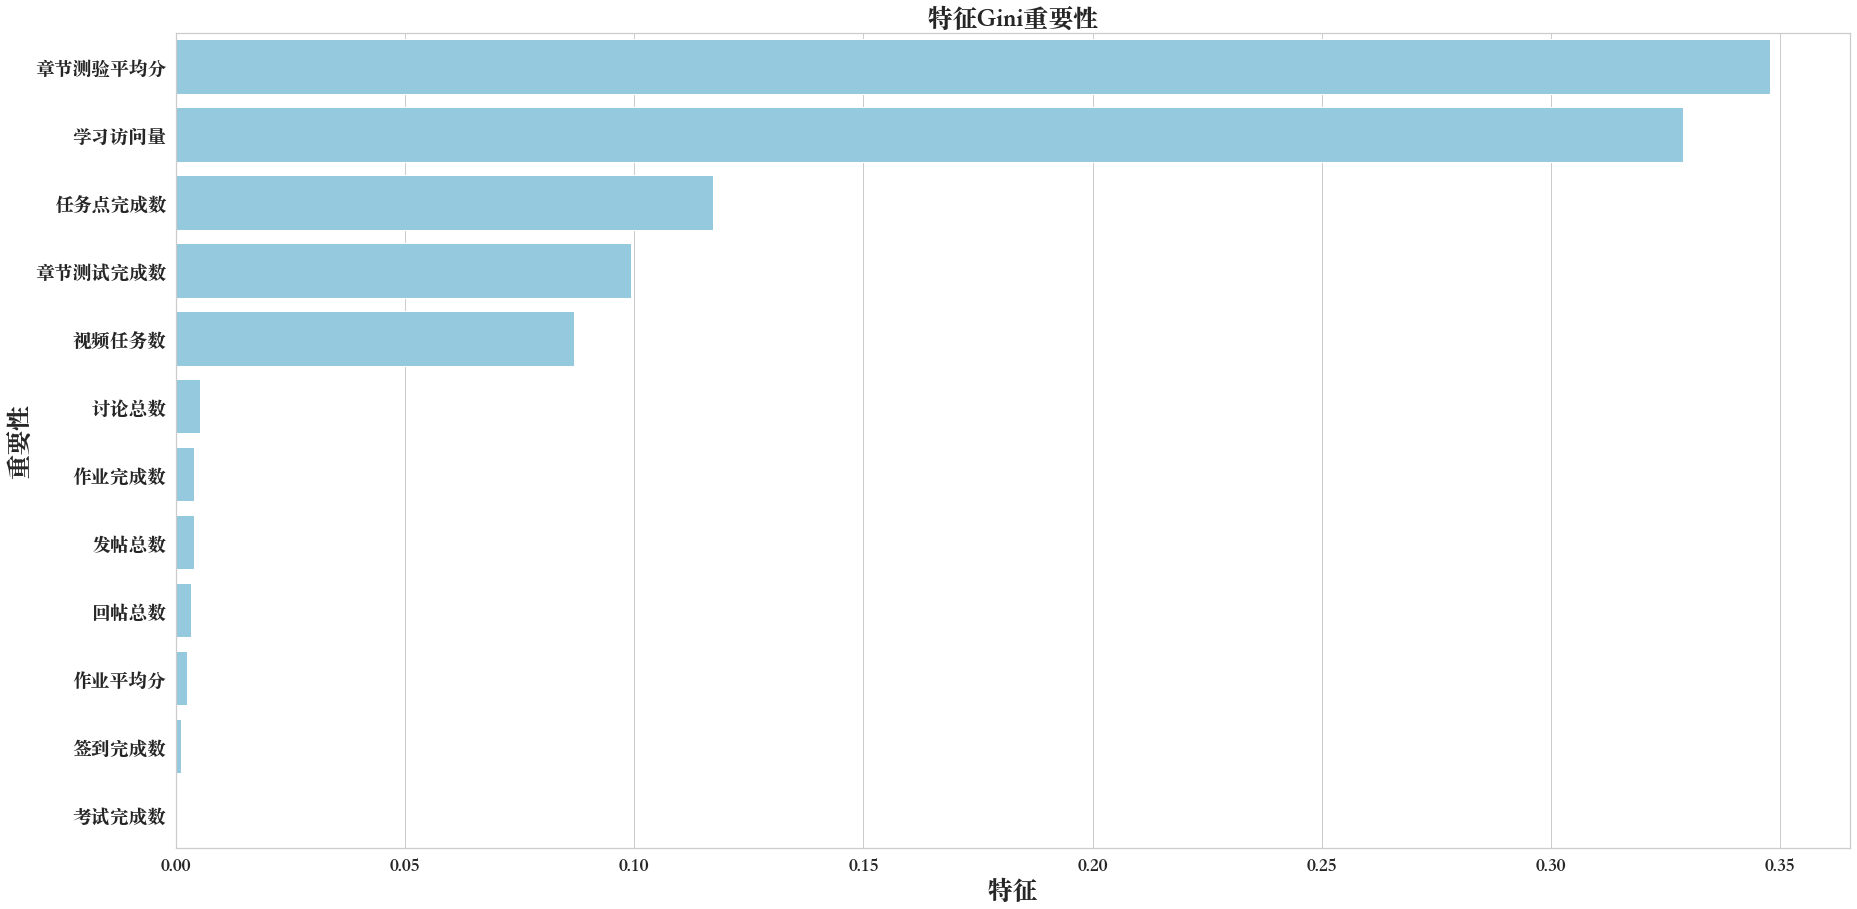

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Songti SC']
plt.rcParams['axes.unicode_minus'] = False 
feats = {}
for feature, importance in zip(student_data_tmp_2.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(font='Songti SC',style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
fg = sns.barplot(y=importances['Features'], x=importances['Gini-Importance'], data=importances, color='skyblue')
plt.xlabel('特征', fontsize=25, weight = 'bold')
plt.ylabel('重要性', fontsize=25, weight = 'bold')
plt.title('特征Gini重要性', fontsize=25, weight = 'bold')

In [38]:
fig=fg.get_figure()
fig.savefig('/Users/vigoroushui/shnu/Features.png')

In [21]:
data = pd.DataFrame.from_dict(feats,orient='index',columns=['Feature'])
data

,Feature
任务点完成数,0.117203
视频任务数,0.086931
章节测试完成数,0.099219
作业完成数,0.004001
考试完成数,0.000000
学习访问量,0.328899
签到完成数,0.001181
讨论总数,0.005182
发帖总数,0.003836
回帖总数,0.003207


In [67]:
y_pred = rfc.predict(x_test_scaled)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from operator import truediv
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test_scaled, y_pred), 
                                    index = ['0-59', '60-69', '70-79', '80-89', '90-100'], 
                                    columns = ['0:59', '60:69', '70:79', '80:89', '90:100'])
# conf_matrix_baseline.to_latex('/Users/vigoroushui/Desktop/ba.tex')
list_diag = np.diag(conf_matrix_baseline)
list_raw_sum = np.sum(conf_matrix_baseline,axis=1)

each_acc = list_diag/list_raw_sum
each_acc

0-59      0
60-69     0
70-79     0
80-89     0
90-100    0
dtype: int64

In [64]:
#display(accuracy_score(conf_matrix_baseline[i], ))
#display(recall_score(y_test_scaled,y_pred))
#display(cohen_kappa_score(y_test_scaled,y_pred))
#display(f1_score(y_test_scaled,y_pred))
#conf_matrix_baseline
y_test_scaled

array([2, 1, 4, ..., 2, 4, 4])

# 具有主成分降维的随机森林

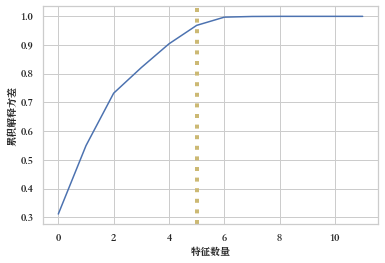

In [24]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components=12)
pca_test.fit(x_train_scaled)
plt.rcParams['font.sans-serif'] = ['Songti SC']
plt.rcParams['axes.unicode_minus'] = False 
sns.set(font = 'Songti SC', style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('特征数量',fontsize=10, weight = 'bold')
plt.ylabel('累积解释方差',fontsize=10, weight = 'bold')
plt.axvline(linewidth=4, color='y', linestyle=':', x=5, ymin=0, ymax=1)
plt.savefig('/Users/vigoroushui/Desktop/pca.png')

In [25]:
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
pca_df.to_latex('/Users/vigoroushui/Desktop/pca.tex')

In [26]:
pca = PCA(n_components=5)
pca.fit(x_train_scaled)
x_train_scaled_pca = pca.transform(x_train_scaled)
x_test_scaled_pca = pca.transform(x_test_scaled)

pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=['任务点完成数','视频任务数','章节测试完成数',
                                  '作业完成数','考试完成数', '学习访问量','签到完成数','讨论总数','发帖总数',
                                   '回帖总数','作业平均分','章节测验平均分'],index=pca_dims)
# pca_test_df.to_latex('/Users/vigoroushui/Desktop/pac_1.tex')
pca_test_df

,任务点完成数,视频任务数,章节测试完成数,作业完成数,考试完成数,学习访问量,签到完成数,讨论总数,发帖总数,回帖总数,作业平均分,章节测验平均分
PCA Component 0,-4.202053e-01,-3.819899e-01,-3.816348e-01,3.862012e-01,-0.000000e+00,-2.141919e-01,3.832165e-01,0.034722,0.028646,0.034767,3.846433e-01,-1.969680e-01
PCA Component 1,3.592338e-01,3.006220e-01,3.453316e-01,4.291286e-01,-0.000000e+00,2.421410e-01,4.271510e-01,-0.088028,-0.079647,-0.053937,4.279089e-01,1.896686e-01
PCA Component 2,6.983655e-02,6.739752e-02,5.912274e-02,3.508154e-02,2.220446e-16,5.599734e-02,3.520728e-02,0.695817,0.677849,0.191231,3.514828e-02,5.776425e-03
PCA Component 3,-1.007963e-02,1.448755e-02,-3.293579e-02,-1.879990e-03,-3.469447e-17,2.062169e-01,-6.731442e-04,-0.042100,-0.237690,0.946249,-1.110574e-03,-4.916040e-02
PCA Component 4,-5.308435e-02,-2.206838e-01,1.119854e-01,1.780265e-03,-0.000000e+00,-4.450860e-01,7.053675e-04,0.017374,-0.011961,0.145453,3.163893e-03,8.462997e-01
PCA Component 5,-2.489570e-01,-3.247319e-01,-1.372437e-01,-2.825994e-02,5.551115e-17,8.072879e-01,-2.685009e-02,0.007685,0.038580,-0.149311,-2.724969e-02,3.686687e-01
PCA Component 6,-5.480974e-02,6.556994e-01,-7.039971e-01,1.013969e-02,-1.110223e-16,2.832651e-03,1.081834e-02,-0.000342,0.003944,-0.020920,1.115294e-02,2.657756e-01
PCA Component 7,-1.203073e-03,1.235100e-03,8.771587e-04,1.831160e-01,-3.155028e-16,1.351414e-03,-7.818230e-01,0.000018,-0.000012,0.000150,5.959987e-01,-1.146716e-03
PCA Component 8,8.773084e-03,-4.973169e-03,-4.604055e-03,-7.943298e-01,2.923009e-16,-7.281609e-04,2.394495e-01,-0.000078,0.000048,-0.000629,5.581929e-01,-1.025246e-03
PCA Component 9,7.883653e-01,-4.181359e-01,-4.511211e-01,8.195586e-03,8.125445e-15,-1.656215e-03,-5.046489e-03,0.000016,0.000127,-0.000537,-6.013491e-03,-6.578745e-04


In [27]:
rfc_2 = RandomForestClassifier()
rfc_2.fit(x_train_scaled_pca,y_train_scaled)
rfc_2.score(x_train_scaled_pca,y_train_scaled)

/Users/vigoroushui/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9734743411927878

In [28]:
y_pred_pca = rfc_2.predict(x_test_scaled_pca)
conf_matrix_baseline_pca = pd.DataFrame(confusion_matrix(y_test_scaled, y_pred_pca), 
                                        index = ['0-59', '60-69', '70-79', '80-89', '90-100'], 
                                        columns = ['0:59', '60:69', '70:79', '80:89', '90:100'])
conf_matrix_baseline_pca
accuracy_score(y_test_scaled, y_pred_pca)

,0:59,60:69,70:79,80:89,90:100
0-59,10,3,5,21,15
60-69,2,19,24,50,44
70-79,5,34,80,150,93
80-89,7,24,90,452,204
90-100,9,29,72,282,748


0.5295307443365695

# 使用RandomSearchCV和GridSearchCV 进行超参数调整

In [29]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,'max_features': max_features,
              'max_depth': max_depth,'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc_2, param_dist, n_iter = 100, cv = 3, verbose = 1, n_jobs=-1, random_state=0)
rs.fit(x_train_scaled_pca, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


{'n_estimators': 1000,
 'min_samples_split': 12,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [30]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop(['mean_fit_time', 'std_fit_time', 'mean_score_time','std_score_time', 
                    'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'std_test_score'],axis=1)
rs_df

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,1000,12,7,sqrt,10,True,0.601942,1
1,800,28,12,sqrt,14,True,0.601768,2
2,300,28,7,log2,13,True,0.601248,3
3,300,18,18,sqrt,13,True,0.600902,4
4,700,2,2,log2,11,True,0.600728,5
...,...,...,...,...,...,...,...,...
95,200,39,44,sqrt,1,True,0.532767,95
96,200,12,50,sqrt,1,False,0.531727,97
97,100,18,12,sqrt,1,False,0.529820,98
98,600,28,2,sqrt,1,False,0.520458,99


Text(0.5, 1.0, 'bootstrap')

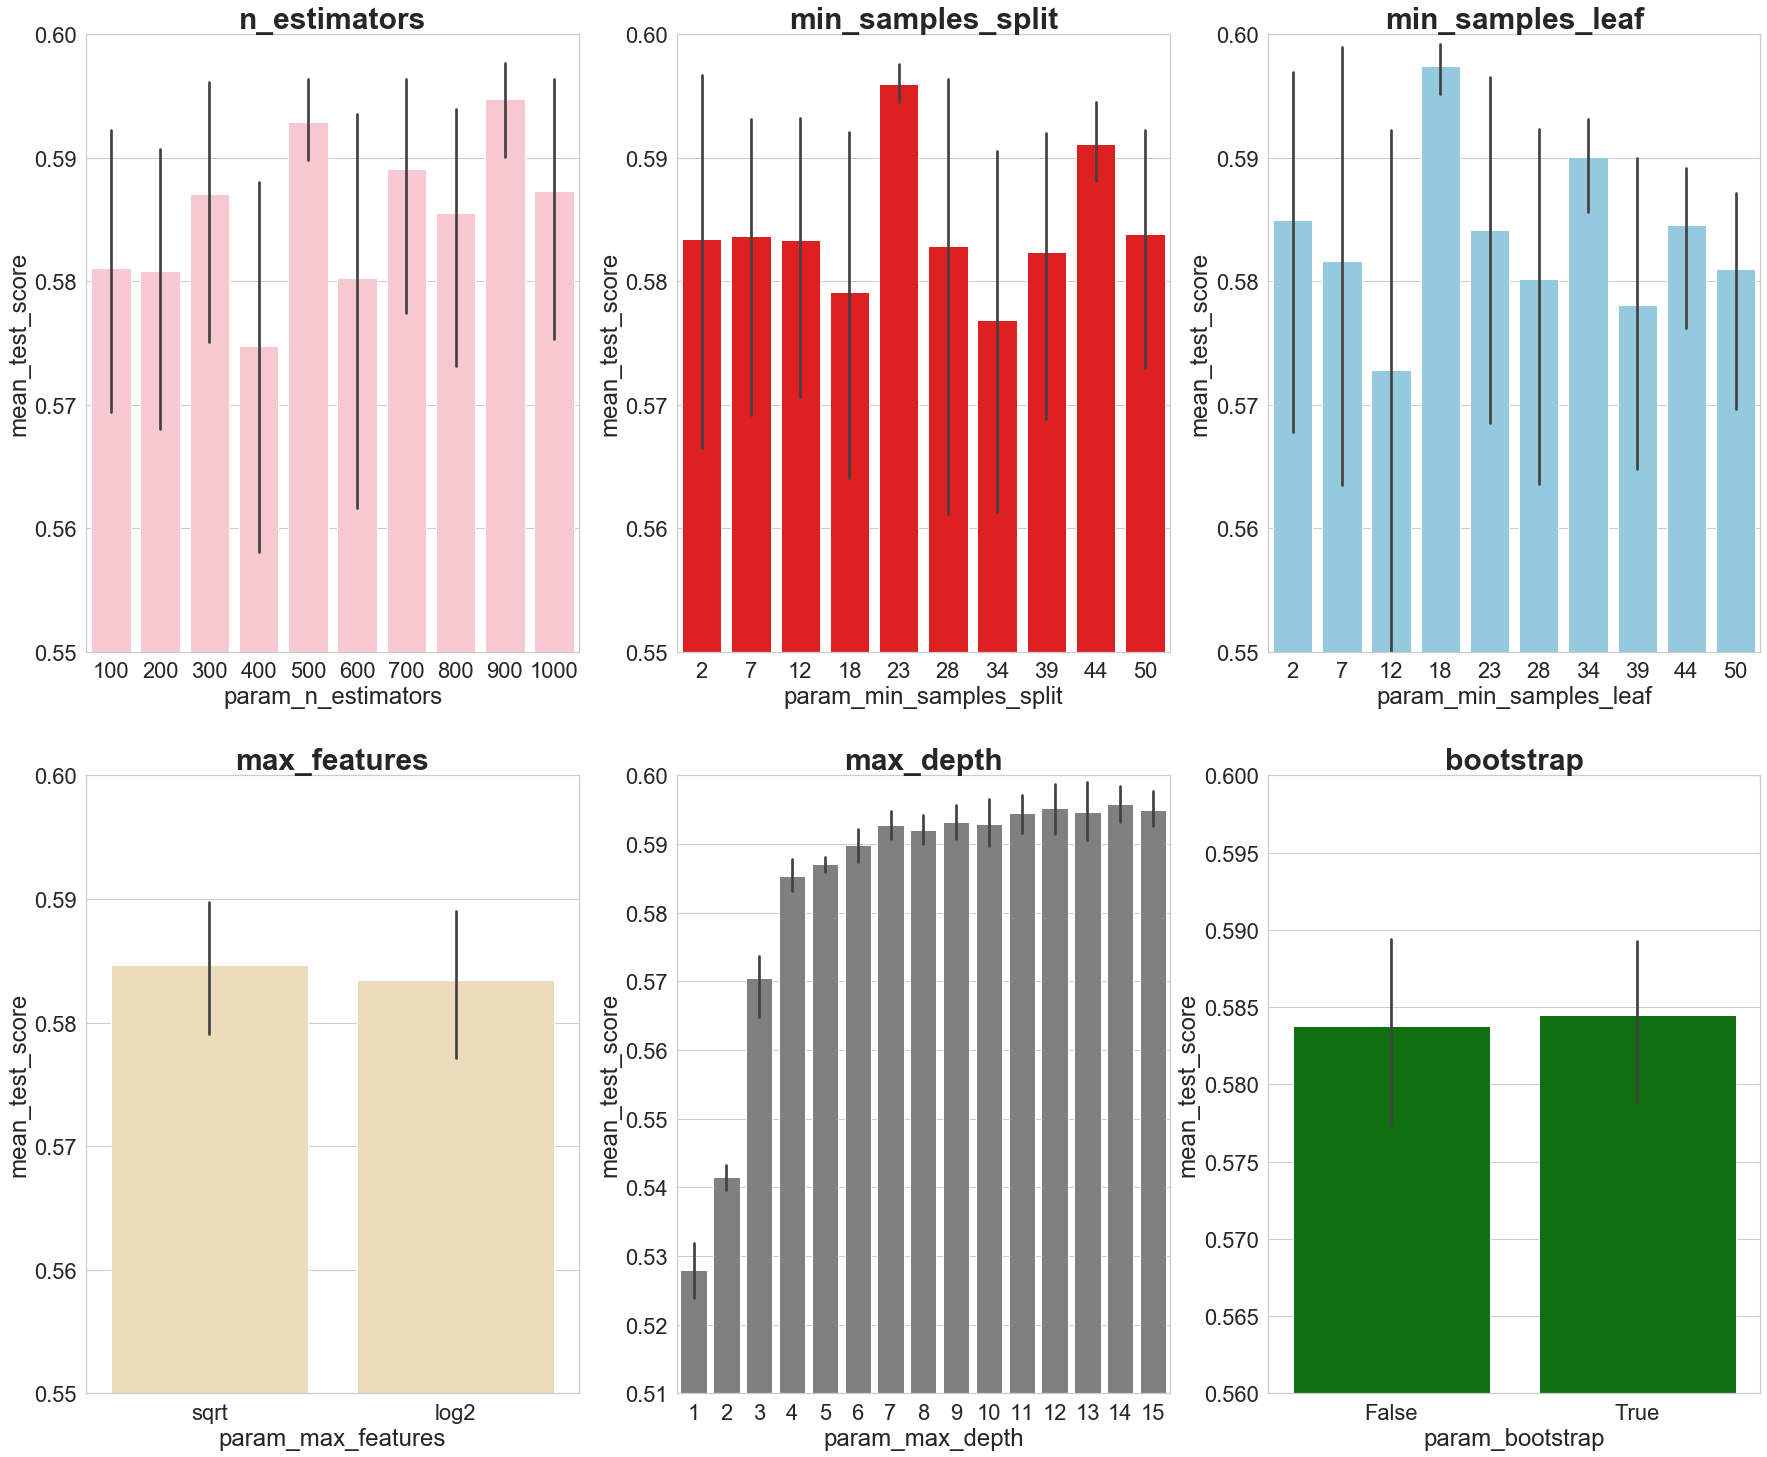

In [34]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='pink')
axs[0,0].set_ylim([.55,.6])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='red')
axs[0,1].set_ylim([.55,.6])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='skyblue')
axs[0,2].set_ylim([.55,.6])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.55,.6])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='grey')
axs[1,1].set_ylim([.51,.6])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='green')
axs[1,2].set_ylim([.56,.6])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')

In [35]:
from sklearn.model_selection import GridSearchCV
n_estimators = [500,900]
max_features = ['sqrt']
max_depth = [7,8,9,10,11,12,13,14,15]
min_samples_split = [23,44]
min_samples_leaf = [18,34]
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,
              'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
gs = GridSearchCV(rfc_2, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(x_train_scaled_pca, y_train)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.3min finished


{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 18,
 'min_samples_split': 44,
 'n_estimators': 500}

In [38]:
rfc_3.fit(x_train_scaled_pca, y_train)
rfc_3.score(x_train_scaled_pca, y_train)

0.6560332871012483

In [39]:
y_pred_pca_tune = rfc_3.predict(x_test_scaled_pca)
conf_matrix_tuned_pca = pd.DataFrame(confusion_matrix(y_test_scaled, y_pred_pca_tune), 
                                     index = ['0-59', '60-69', '70-79', '80-89', '90-100'], 
                                     columns = ['0:59', '60:69', '70:79', '80:89', '90:100'])
display(conf_matrix_tuned_pca)
accuracy_score(y_test_scaled, y_pred_pca_tune)

,0:59,60:69,70:79,80:89,90:100
0-59,9,0,1,26,18
60-69,1,0,24,63,51
70-79,0,0,89,143,130
80-89,1,0,65,458,253
90-100,0,0,31,160,949


0.6088187702265372

In [43]:
conf_matrix_tuned_pca['acc'] = [0.167,0,0.246, 0.589, 0.832]

In [45]:
conf_matrix_tuned_pca.to_latex('/Users/vigoroushui/Desktop/c.tex')